# MNIST: loading and visualization

In [1]:
# J_Learn_ML_PyTorch_mnist_01_vis
# Visualize mnist dataset
# Based on https://www.kaggle.com/vincentlefoulon/pytorch-mnist

import numpy as np
import torch
import torchvision

import matplotlib.pyplot as plt
%matplotlib inline

import sys, os, platform


## Datal loading and visualization

In [2]:
# Loading mechanism
batchSz=8

trainset=torchvision.datasets.MNIST('/tmp',train=True,download=True,
                                   transform=torchvision.transforms.ToTensor())
trainLoader=torch.utils.data.DataLoader(trainset,batch_size=batchSz,shuffle=True)
dataiter=iter(trainLoader)

# trainset implements __len__ and __getitem__
print('Number of samples in trainset: {:d}'.format(len(trainset)))

  0%|          | 0/9912422 [00:00<?, ?it/s]

100%|█████████▉| 9912320/9912422 [27:45<00:00, 18771.67it/s] 

Extracting /tmp/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/MNIST/raw



0it [00:00, ?it/s]
  0%|          | 0/28881 [00:00<?, ?it/s]


 28%|██▊       | 8192/28881 [00:00<00:00, 29269.43it/s]
32768it [00:00, 41538.22it/s]                           

0it [00:00, ?it/s]

Extracting /tmp/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/MNIST/raw



 38%|███▊      | 622592/1648877 [00:11<00:20, 50209.67it/s]
9920512it [28:00, 18771.67it/s]                             [A
 99%|█████████▉| 1638400/1648877 [04:28<00:00, 11161.20it/s]

8192it [00:00, 137415.87it/s]


Extracting /tmp/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/MNIST/raw
Extracting /tmp/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/MNIST/raw
Processing...
Done!
Number of samples in trainset: 60000



1654784it [04:43, 11161.20it/s]                             

Labels:  tensor([ 0,  9,  3,  3,  8,  3,  0,  8])
Batch shape:  torch.Size([8, 1, 28, 28])


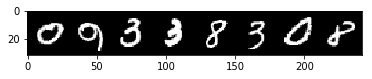

In [3]:
# Load a sample of data
images,labels=dataiter.next() # images: B X C X H X W
print('Labels: ', labels)
print('Batch shape: ', images.size())

# Display
im=torchvision.utils.make_grid(images)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [4]:
# Flatten to data structure for MLP: [B X C X H W] --> [B x nFeature]
images.view(batchSz,-1).size()

torch.Size([8, 784])

## Summary and extension

This section summarize the underlying mechanism of PyTorch data loading procedure above. See also https://am207.github.io/2018spring/wiki/ValidationSplits.html.

 - Class Dataset (torch.utils.data.Dataset), contains the data
     - Abstrct class, to which all datasets should subclass
     - The subclass implements __len__ and __getitem__
     - torchvision.datasets.mnist.MNIST is such a subclass
 - Class DataLoader (torch.utils.data.DataLoader)
     - This class takes torch.utils.data.Dataset, and provides sampler and iterator over it
 - Training and validation split
     - Split indices (randomly, shuffled) to training and validation sets
     - Use SubsetRandomSampler (torch.utils.data.sampler.SubsetRandomSampler) as the sampler of classDataLoader
         - It is appropriate for training
         - Non-shuffled sampler may be preferred for validtion, which does no exists in PyTorch
     - Note SubsetRandomSampler takes indices as argument in instantiation, which is needed for split on indices
         - For validation, we would need a "SubsetSequentialSampler", not SequentialSampler


In [5]:
# Train validation split
nSample=len(trainset)
tvRatio=0.8 # for trainging
nTrain=int(nSample*tvRatio)
idxPerm=np.random.permutation(nSample)

idx_t=idxPerm[:9]  # Use a small set for testing below
idx_v=idxPerm[nTrain:nTrain+5]

sampler_t=torch.utils.data.sampler.SubsetRandomSampler(idx_t)
sampler_v=torch.utils.data.sampler.SubsetRandomSampler(idx_v)

loader_t=torch.utils.data.DataLoader(dataset=trainset,batch_size=4,sampler=sampler_t,drop_last=True)
loader_v=torch.utils.data.DataLoader(dataset=trainset,batch_size=2,sampler=sampler_v,drop_last=True)


In [6]:
# Generate training mini-batches
for epoch in range(4):
    for kk, (img,label) in enumerate(loader_t):
        print(epoch, kk, label, img.size())

0 0 tensor([ 2,  4,  0,  7]) torch.Size([4, 1, 28, 28])
0 1 tensor([ 2,  7,  7,  1]) torch.Size([4, 1, 28, 28])
0 2 tensor([ 7]) torch.Size([1, 1, 28, 28])
1 0 tensor([ 7,  2,  0,  2]) torch.Size([4, 1, 28, 28])
1 1 tensor([ 7,  4,  7,  7]) torch.Size([4, 1, 28, 28])
1 2 tensor([ 1]) torch.Size([1, 1, 28, 28])
2 0 tensor([ 7,  7,  1,  7]) torch.Size([4, 1, 28, 28])
2 1 tensor([ 2,  2,  7,  0]) torch.Size([4, 1, 28, 28])
2 2 tensor([ 4]) torch.Size([1, 1, 28, 28])
3 0 tensor([ 7,  1,  2,  4]) torch.Size([4, 1, 28, 28])
3 1 tensor([ 0,  2,  7,  7]) torch.Size([4, 1, 28, 28])
3 2 tensor([ 7]) torch.Size([1, 1, 28, 28])
